# Example Notebook

This is a modified version of the official Quantopian Zipline [buyapple.ipynb](https://github.com/quantopian/zipline/blob/00a053cc38a0e88e18c85bdefe648960f748092f/zipline/examples/buyapple.ipynb) example.

In [1]:
%matplotlib inline
%load_ext zipline

In [2]:
!zipline ingest -b quantopian-quandl

Writing data to /root/.zipline/data/quantopian-quandl/2017-04-08T01;10;49.277428.


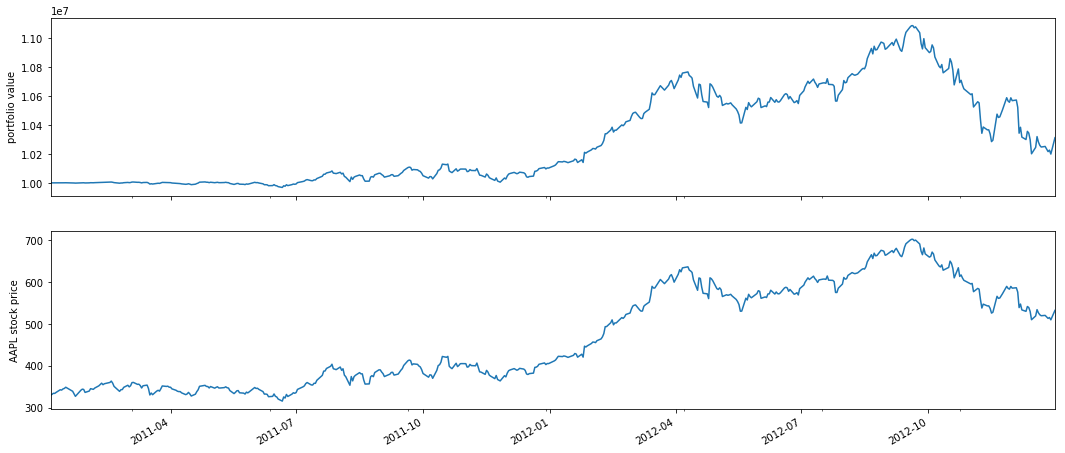

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2011-01-03 21:00:00+00:00,329.570,NaN,0.000000e+00,NaN,0.011315,NaN,NaN,0.00,10000000.00,0.00,...,0,0,0,NaN,10000000.00,0.00,0.00,1,[],0.0336
2011-01-04 21:00:00+00:00,331.290,0.000001,-1.000000e-07,-0.000023,0.009987,0.141748,0.000008,-3313.90,9996686.10,3312.90,...,0,0,0,-11.224972,10000000.00,0.00,0.00,2,"[{'dt': 2011-01-04 21:00:00+00:00, 'amount': 1...",0.0336
2011-01-05 21:00:00+00:00,334.000,0.000024,2.510000e-06,0.000201,0.015044,0.100231,0.000008,-3341.00,9993345.10,6680.00,...,0,0,0,230.045324,9996686.10,3312.90,3312.90,3,"[{'dt': 2011-01-05 21:00:00+00:00, 'amount': 1...",0.0350
2011-01-06 21:00:00+00:00,333.730,0.000023,1.870000e-06,0.000059,0.012889,0.099481,0.000072,-3338.30,9990006.80,10011.90,...,0,0,0,22.913722,9993345.10,6680.00,6680.00,4,"[{'dt': 2011-01-06 21:00:00+00:00, 'amount': 1...",0.0344
2011-01-07 21:00:00+00:00,336.120,0.000051,8.940000e-06,0.000524,0.011021,0.093360,-0.000132,-3362.20,9986644.60,13444.80,...,0,0,0,97.979577,9990006.80,10011.90,10011.90,5,"[{'dt': 2011-01-07 21:00:00+00:00, 'amount': 1...",0.0334
2011-01-10 21:00:00+00:00,342.455,0.000159,3.418000e-05,0.001676,0.009629,0.086675,-0.000592,-3425.55,9983219.05,17122.75,...,0,0,0,341.961345,9986644.60,13444.80,13444.80,6,"[{'dt': 2011-01-10 21:00:00+00:00, 'amount': 1...",0.0332
2011-01-11 21:00:00+00:00,341.640,0.000156,3.000500e-05,0.001415,0.013390,0.080133,-0.000694,-3417.40,9979801.65,20498.40,...,0,0,0,42.612419,9983219.05,17122.75,17122.75,7,"[{'dt': 2011-01-11 21:00:00+00:00, 'amount': 1...",0.0337
2011-01-12 21:00:00+00:00,344.420,0.000160,4.658500e-05,0.001574,0.022518,0.084200,-0.000152,-3445.20,9976356.45,24109.40,...,0,0,0,61.885447,9979801.65,20498.40,20498.40,8,"[{'dt': 2011-01-12 21:00:00+00:00, 'amount': 1...",0.0340
2011-01-13 21:00:00+00:00,345.680,0.000151,5.530500e-05,0.001660,0.020769,0.082298,-0.000193,-3457.80,9972898.65,27654.40,...,0,0,0,69.267298,9976356.45,24109.40,24109.40,9,"[{'dt': 2011-01-13 21:00:00+00:00, 'amount': 1...",0.0334
2011-01-14 21:00:00+00:00,348.480,0.000164,7.760500e-05,0.001859,0.028307,0.081684,0.000136,-3485.80,9969412.85,31363.20,...,0,0,0,92.208331,9972898.65,27654.40,27654.40,10,"[{'dt': 2011-01-14 21:00:00+00:00, 'amount': 1...",0.0335


In [3]:
%%zipline --start=2011-1-1 --end=2013-1-1

from zipline.api import order, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    pass

def handle_data(context, data):
    order(symbol('AAPL'), 10)
    record(AAPL=data[symbol('AAPL')].price)
    
def analyze(context, perf):
    ax1 = plt.subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value')
    ax2 = plt.subplot(212, sharex=ax1)
    perf.AAPL.plot(ax=ax2)
    ax2.set_ylabel('AAPL stock price')
    plt.gcf().set_size_inches(18, 8)
    plt.show()